# 第33讲 时域信号处理与空域信号 (图像)处理

scipy.signal含有200多个信号处理函数：TransferFunction， StateSpace，tf2ss，其它（略），这些函数能够完成对信号的各种处理。

信号处理，就是将信号作为“各种滤波”系统的输入信号，经过系统滤波（即求解系统输出信号）完成对信号的处理。
因此信号处理任务核心是构建具有各种特性的**滤波系统**，并求解系统输出信号。


## 连续系统的传递函数描述方法

传递函数是指零初始条件下线性系统响应（即输出）量的拉普拉斯变换（或z变换）与激励（即输入）量的拉普拉斯变换之比。
记作G(s)=Y(s)/U(s)，其中Y(s)、U(s)分别为输出量和输入量的拉普拉斯变换。

线性系统的n阶微分方程为：
$$
\sum_{𝑘=0}^{𝑛}{𝑎_{𝑛−𝑘}𝑦^{(𝑘)}(𝑡)}
=\sum_{𝑘=0}^{𝑚}{𝑏_{𝑚−𝑘}𝑓^{(𝑘)}(𝑡)} (𝑚≤𝑛),
$$
$𝑦^{𝑙}(0),𝑙=0,1,…𝑛−1(已知),y(t)为系统输出信号，f(t)为系统输入信号.$

取拉普拉斯变换得到
$$
𝐴(𝑠)𝑌(𝑠)=𝐵(𝑠)𝐹(𝑠)+𝐶(𝑠)
$$
$$
𝑌(𝑠)=\int_{0_−}^{∞}{𝑦(𝑡) 𝑒^{−𝑠 𝑡}𝑑𝑡},
$$
$$
𝐹(𝑠)=\int_{0_+}^{∞}{𝑓(𝑡)𝑒^{−𝑠 𝑡)}𝑑𝑡}
$$
$$
𝐴(𝑠)=\sum_{𝑘=0}^{𝑛}{𝑎_{𝑛−𝑘}𝑠^𝑘}=𝑎_{0}𝑠^{𝑛}+…+𝑎_{𝑛},
$$
$$
𝐵(𝑠)=\sum_{𝑘=0}^{𝑚}{𝑏_{𝑚−𝑘}𝑠^𝑘}=𝑏_{0}𝑠^{𝑚}+…+𝑏_{𝑚},
$$
$$
𝐶(𝑠)=\sum_{𝑙=0}^{𝑛−1}{𝑎_{𝑙}}\sum_{𝑗=0}^{𝑛−1−𝑙}{𝑦^{𝑛−1−𝑙−𝑗}(0) 𝑠^𝑗 }
$$


定义线性时不变系统的**传递函数**为:

$TF(s)=B(s)/A(s)$(实系数有理分式函数)，
则有
$$
Y_{zs}(s)=TF(s)F(s),  y_{zs}(t)=ILT[Y_{zs}(s)]
$$
$$
Y_{zi}(s)=C(s)/A(s),  y_{zi}(t)=ILT[Y_{zi}(s)]
$$
$$
y(t)=y_{zs}(t)+y_{zi}(t),
$$

(1) 系统结构和输入信号共同决定系统**零状态响应$y_{zs}(t)$**；

(2) 系统结构和历史(初值$y(0),y'(0),...)$共同决定系统**零输入响应$y_{zi}(t)$**；

(3) 系统结构、历史(初值$y(0),y'(0),...)$、输入信号共同决定**全响应$y(t)$**.


例如，连续线性二阶时不变系统为  


In [4]:
import numpy as np
from scipy import signal

# y''(t)+4*y'(t)+3*y(t)=f''(t)-5*f'(t)+6*f(t)
# H(s)=(s^2-5*s+6)/(s^2+4*s+3);
# X0=[y'(0),y(0)]

num=[1,-5,6]
den=[1,4,3]    
tf1=signal.TransferFunction(num,den)
print(tf1)

TransferFunctionContinuous(
array([ 1., -5.,  6.]),
array([1., 4., 3.]),
dt: None
)


该系统求解步骤：

1.求简化系统$x''(t)+4x'(t)+3x(t)=f(t)$的0状态(即初值全为0)响应$x_{zs}(t)$（以及$f(t)=d(t)$的单位脉冲响应$impulse(t)$、
$f(t)=h(t)$的单位阶跃响应$step(t)$) .

2.求无输入系统$x''(t)+4x'(t)+3x(t)=0$且初值为$X0=[y'(0),y(0)]$的0输入响应$x_{zi}(t)$.

3.构建原系统响应y(t)：

 $ y(t)=x_{zs}''(t)-5x_{zs}'(t)+6x_{zs}(t)+x_{zi}(t) =[x_{zs}''(t),x_{zs}'(t),x_{zs}(t)].dot(num)+x_{zi}(t)]$

## 离散系统的传递函数描述方法


$$
\sum_{j=0}^{𝑛}{𝑎_{j}𝑦(𝑘-j)}
=\sum_{𝑘=0}^{𝑚}{𝑏_{j}𝑓(𝑘-j)}    ,(𝑚≤𝑛),
𝑦(-𝑙),𝑙=1,…𝑛(已知)
$$
对方程取z变换得到
$$
𝐴(z)𝑌(z)=𝐵(z)𝐹(z)+𝐶(z)
$$
$$
𝑌(z)=\sum_{k=0}^{∞}{𝑦(k) z^{-k}},𝐹(z)=\sum_{k=0}^{∞}{𝑓(k)z^{−k)}}
$$
$$
𝐴(z)=\sum_{l=0}^{𝑛}{𝑎_{l}z^{-l}}=𝑎_{1}z^{-1}+…+𝑎_{n}z^{-𝑛},
$$
$$
𝐵(z)=\sum_{l=0}^{𝑚}{𝑏_{l}z^{-l}}=𝑏_{0}+𝑏_{1}z^{-1}+…+𝑏_{𝑚}z^{-m},
$$
$$
𝐶(z)=\sum_{𝑙=0}^{𝑛−1}{𝑎_{𝑙}}\sum_{k=0}^{𝑙-1}{𝑦(k−𝑙) z^{-k} }
$$


定义线性时不变系统的传递函数为

$TF(z)=B(z)/A(z)$(实系数有理分式函数)，则有

Yzs(z)=TF(z)F(z),yzs(k)=IZT[Yzs(z)]

Yzi(z)=C(z)/A(z),yzi(k)=IZT[Yzi(z)]

y(k)=yzs(k)+yzi(k),

(1) 系统结构和输入信号共同决定系统零状态响应yzs(k)；


(2) 系统结构和历史(初值用y(-1),y(-2),...y(-n))共同决定系统零输入响应yzi(k)；


(3)  系统结构、历史(初值)、输入信号共同结构相同全响应y(k)


例如，离散线性二阶时不变系统为 

In [2]:
import numpy as np
from scipy import signal
# y(k)+4y(k-1)+3y(k-2)=f(k)-5f(k-1)+6f(k-2)
# H(z)=(1-5/z+6/z^2)/(1+4/z+3/z^2)
# X0=[y(-1),y(-2)]

num=[1,-5,6];
den=[1,4,3];
tf2=signal.TransferFunction(num,den,dt=0.01)
print(tf2)

TransferFunctionDiscrete(
array([ 1., -5.,  6.]),
array([1., 4., 3.]),
dt: 0.01
)


该系统求解步骤：

 1. 求简化系统$x(k)+4x(k-1)+3x(k-2)=f(k)$的0状态(即初值全为0)响应$x_{zs}(k)$（以及$f(k)=d(k)$的单位脉冲响应$impulse(k)$、$f(k)=h(k)$的单位阶跃响应$step(k))$ .
 
 2. 求无输入系统$x(k)+4x(k-1)+3x(k-2)=0$且初值为$X0=[y(-2),y(-1)]$的0输入响应$x_{zi}(k)$.
 
 3. 构建原系统响应$y(k)$：
 
  $y(k)=x_{zs}(k)-5x_{zs}(k-1)+6x_{zs}(k-2)+x_{zi}(k)=[x_{zs}(k),x_{zs}(k-1),x_{zs}(k-2)].dot(num)+x_{zi}(k)]$


## 信号处理python 编程

In [13]:
from scipy import signal as sg
num=[1,-5,6];
den=[1,4,3];
#x0=[y`(0),y(0)]
x0=[0.5,2] #初值
tf1=sg.TransferFunction(num,den);#原系统
print(tf1)

t=np.linspace(0,5,101);


tf1.outputs
tf0=sg.TransferFunction([1],[1,4,3])#简化系统
print(tf0)
tf2=sg.TransferFunction(num,den,dt=0.01)#离散系统
print(tf2)

TransferFunctionContinuous(
array([ 1., -5.,  6.]),
array([1., 4., 3.]),
dt: None
)
TransferFunctionContinuous(
array([1.]),
array([1., 4., 3.]),
dt: None
)
TransferFunctionDiscrete(
array([ 1., -5.,  6.]),
array([1., 4., 3.]),
dt: 0.01
)


tf1和tf2有如下内嵌函数：

bode(), freqresp(),poles,to_ss(),zeros, impulse(),output(),step(),to_tf(),  inputs,outputs, to_discrete(), to_zpk(),num,den,dt

准备好输入信号采样u和时间采样t以及初值x0

1. 调用tf0.output(u,t,X0=None)求出x''(t)+4x'(t)+3x(t)=f(t)系统在输入信号u激励下的响应xzs(t)

2. 调用tf0.output(0*u,t,X0=x0)求出系统在初值激励下的0输入响应xzi(t)

3. 原系统响应y(t)=xzs''(t)-5xzs'(t)+6xzs(t) +xzi(t)。

   调用tf1.impulse()和tf1.step()求系统的单位脉冲响应和单位阶跃响应时，系统的退化为tf0。
   
   系统的频率响应为tf1. freqresp(),系统波特率为tf1.bode(). 
   
   对于二阶系统，ts,yzs,x=tf1.output(u,t,X0=None)将输出num=[1]对应的系统状态变量响应xzs(t)=x[:,1]及其一阶导数xzs'(t)=x[:,0],而yzs(t)对应系统0状态响应，它也等于x''(t)-5x'(t)+6x(t).
   
  

In [ ]:
t=np.linspace(0,10,501);
ts,ys=tf0.step(T=t,X0=None);
pl.plot(ts,ys);pl.show()

## 零状态响应

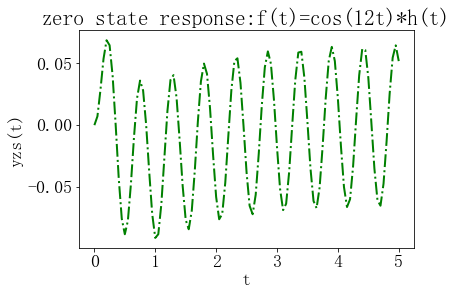

In [14]:
from scipy import signal as sg
import pylab as pl
import numpy as np

num=[1,-5,6];
den=[1,4,3]

y0=[0,0]    #y0=[y'(0),y(0)] #初值

t=np.linspace(0,5,101)  #时间采样

def h(x):  #阶跃信号
    if x>0: 
        return 1
    else:
        if x==0:
            return 0.5
        return 0
    
u=np.cos(12*t)*np.array(list(map(h,t)));  # 输入信号

tf=sg.TransferFunction([1],den)           # 定义系统

ts,yzs,xzs=tf.output(U=u,T=t,X0=y0)       # 系统求解

pl.rcParams['font.sans-serif']=['SimSun']
pl.rcParams['axes.unicode_minus']=False
pl.rcParams['font.size']=18
pl.plot(ts,10*yzs,'g-.',lw=2)
pl.xlabel('t');
pl.ylabel('yzs(t)');
pl.title("zero state response:f(t)=cos(12t)*h(t)")
pl.show()

## 零输入响应之一由X0和den决定与num无关
## 零输入响应之二由X0和den和num共同决定


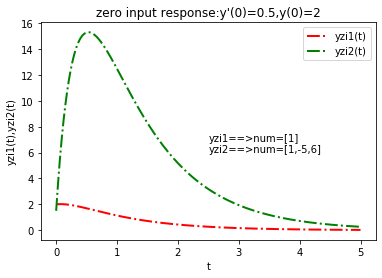

In [4]:
 
from scipy import signal as sg
import pylab as pl
npp=pl.np

num=[1,-5,6];
den=[1,4,3]
y0=[0.5,2]#y0=[y'(0),y(0)]
t=npp.linspace(0,5,501)

tf1=sg.TransferFunction([1],den)

ts,yzi1,x1=tf1.output(U=None,T=t,X0=y0)

tf2=sg.TransferFunction(num,den)
ts,yzi2,x2=tf2.output(U=None,T=t,X0=y0)

pl.plot(ts,yzi1,'r-.',ts,yzi2,'g-.',lw=2)
pl.xlabel('t')
pl.ylabel('yzi1(t),yzi2(t)');
pl.legend(['yzi1(t)','yzi2(t)']);
pl.title("zero input response:y'(0)=0.5,y(0)=2")
pl.text(2.5,6,'yzi1==>num=[1]\nyzi2==>num=[1,-5,6]')
pl.show()

## 系统零极增益描述方法

输入信号给定后，系统的零状态响应$Y_{zs}(s)$完全由系统结构决定。系统的传递函数也可以由$A(s)$零点（即传递函数的极点p1,p2,...）和B(s)的零点(z1,z2,...)以及一个增益因子k完全决定，即
$$
TF(s)=\frac{B(s)}{A(s)}=\frac{k(s-z_{1})...(s-z_{m})}{(s-p_{1})...(s-p_{n})}
$$

给定系统的零点(z1,z2,...)、极点(p1,p2,...)和增益k，系统的结构就唯一确定了。因此系统结构，既可以用传递函数TF(s)描述，也可以用零极点和增益zpk来描述。

例如 

In [32]:
z=[2,3];
p=[-1,-3];
k=[10]; 
ZPG=sg.ZerosPolesGain(z,p,k); 
ZPG

ZerosPolesGainContinuous(
array([2, 3]),
array([-1, -3]),
[10],
dt: None
)

In [33]:
ZPG.to_tf()

TransferFunctionContinuous(
array([ 10., -50.,  60.]),
array([1., 4., 3.]),
dt: None
)

In [34]:
ZPG.to_ss()

StateSpaceContinuous(
array([[-4., -3.],
       [ 1.,  0.]]),
array([[1.],
       [0.]]),
array([[-90.,  30.]]),
array([[10.]]),
dt: None
)

## 系统的状态空间(变量)描述方法

一个有n个动态元件的线性时不变系统，既可以用传递函数描述，也可以选定n个状态变量来描述。
$$
\frac{d}{dt}{\left(
\begin{array}{c}
x_{1}(t)\\
...    \\
x_{n}(t)  
\end{array} 
\right )}
=
A{\left(
\begin{array}{c}
x_{1}(t)\\
...    \\
x_{n}(t)  
\end{array} 
\right )}
+
B{\left(
\begin{array}{c}
f_{1}(t)\\
...    \\
f_{m}(t)  
\end{array} 
\right )}
$$

𝐴、B分别𝑛∗𝑛、𝑛∗𝑚常数矩阵

系统响应

$$
{\left(
\begin{array}{c}
y_{1}(t)\\
...    \\
y_{r}(t)  
\end{array} 
\right )}
=
C{\left(
\begin{array}{c}
x_{1}(t)\\
...    \\
x_{n}(t)  
\end{array} 
\right )}
+
D{\left(
\begin{array}{c}
f_{1}(t)\\
...    \\
f_{m}(t)  
\end{array} 
\right )}
$$

𝐶、D分别𝑟∗𝑛、𝑟∗𝑚常数矩阵

对方程取拉普拉斯变换得到

sX(s)=AX(s)+BF(s)+x(0),Y(s)=CX(s)+DF(s)

矩阵(Ins-A)的逆矩阵记为M(s),则有

X(s)=M(s)(BF(s)+x(0))，x(t)=ILT[X(s)]!


$$
x(t)={\left(
\begin{array}{c}
x_{1}(t)\\
...    \\
x_{n}(t)  
\end{array} 
\right )},
x(0)={\left(
\begin{array}{c}
x_{1}(0)\\
...    \\
x_{n}(0)  
\end{array} 
\right )},
X(S)={\left(
\begin{array}{c}
X_{1}(s)\\
...    \\
X_{n}(s)  
\end{array} 
\right )},
$$
$$
X_{j}(s)=\int_{0}^{\infty}{x_{j}(t)e^{-st}}dt,
x_{j}(t)=ILT(X_{j}(s)]
$$

例如

In [26]:
A=[[-4., -3.],[ 1.,0.]]
B=[[1.],[0.]]
C=[[-90.,30.]]
D=[[10.]]
s=sg.StateSpace(A,B,C,D)
s

StateSpaceContinuous(
array([[-4., -3.],
       [ 1.,  0.]]),
array([[1.],
       [0.]]),
array([[-90.,  30.]]),
array([[10.]]),
dt: None
)

## 调用sg.lti构建连续线性时不变系统举例

sg.lti用来构建连续线性时不变系统。sg.dlti用来构建离散线性时不变系统。   

有了系统，我们就可以调用step, impulse,output,bode,freqresp来求系统响应，也就是求信号被处理后的“形象”。


In [27]:
st1=sg.lti([1,-5,6],[1,4,3]);st1

TransferFunctionContinuous(
array([ 1., -5.,  6.]),
array([1., 4., 3.]),
dt: None
)

In [28]:
st2=sg.lti([3,2],[-3,-1],[1]);st2

ZerosPolesGainContinuous(
array([3, 2]),
array([-3, -1]),
[1],
dt: None
)

In [29]:
st3=sg.lti([[-4,-3],[1,0]],[[1],[0]],[[-9,3]],[[1]]);st3

StateSpaceContinuous(
array([[-4, -3],
       [ 1,  0]]),
array([[1],
       [0]]),
array([[-9,  3]]),
array([[1]]),
dt: None
)

In [30]:
st4=sg.lti([1,-1,2,-2],[-3,-4,-5,-6],[5]);st4

ZerosPolesGainContinuous(
array([ 1, -1,  2, -2]),
array([-3, -4, -5, -6]),
[5],
dt: None
)

In [31]:
st4.to_tf()

TransferFunctionContinuous(
array([  5.,   0., -25.,   0.,  20.]),
array([  1.,  18., 119., 342., 360.]),
dt: None
)

## 信号处理函数包scipy.signal中的函数分类

1. 系统描述函数(状态空间矩阵，传递函数分子分母多项式系数， 零点极点复数及增益值)，例如StateSpace,TransferFunction,ZerosPolesGain,lti(线性时不变系统),dlti(离散线性时不变系统)

2. 系统多种描述的相互转换，例如ss2tf,ss2zpk,tf2sos,tf2ss,tf2zpk,zpk2sos,zpk2ss,zpk2tf

3. 系统的脉冲响应、阶跃响应函数，例如impulse,impulse2,step,step2

4. 滤波器设计函数，例如filter_design，fir_filter_design，firls，iirdesign,iirfilter,buttap,butter, buttord,cheb1ap,cheb1ord,cheb2ap,cheb2ord,chebwin,cheby1,cheby2,ellip,ellipap,ellipord

5. 信号滤波函数，例如filtfilt,sosfiltfilt, lfilter_zi, lfilter, lfiltic, savgol_filter, sosfil

6. 系统响应函数，例如bode,sosfreqz,dfreqresp,freqresp,freqs,freqs_zpk,freqz,freqz_zpk,sosfreqz, spectral, spectrogram

7. 各种窗函数，例如barthann,bartlett,bohman,nuttall,parzen,welch,hamming,hann,hanning,gaussian


## 信号系统（常微分方程）求解小结：

1. 依据微分方程的系数写出

num=[1,-5,6]和den=[1,4,3]  并写出初值x0=[0.5，2]

2. 调用
s=scipy.signal.TracnsferFunction(num,den) 
s0=scipy.signal.TracnsferFunction([1],den) 
创建系统

3. 准备好时间和输入信号u的采样

4. 求yzs

t0,yzs,xzs=s.output(U=u,T=t,X0=None)

5. 求yzi

t0,yzi,xzi=s.output(U=None,T=t,X0=x0)

6. y=yzs+yzi


## 图像处理：几何变换，滤波，测量
用到scipy.ndimage和scipy.signal子包及numpy包


图像几何变换处理举例

In [ ]:
from scipy import ndimage as ni
import pylab as pl
import numpy as np
from scipy import misc as mc
a=mc.ascent()
# 几何变换：
# 右旋30度：
a_r=ni.rotate(a,30);
#向右下移动50点：
a_s=ni.shift(a,(50,50),mode='nearest');
#放大到原图的两倍：
a_z=ni.zoom(a,2)
#缩小到原图的0.5倍：
a_z2=ni.zoom(a,0.5)
pl.subplot(221);pl.imshow(a_r)
pl.subplot(222);pl.imshow(a_s)
pl.subplot(223);pl.imshow(a_z);
pl.subplot(224);pl.imshow(a_z2);
pl.show()
#图像的90度旋转，上下左右翻转、裁切已经在数组操作部分学习过了！


filters,滤波器函数集合：

convolve,convolve1d,correlate,correlate1d,n_filter, gaussian_filter，gaussian_filter1d,gaussian_gradient_magnitude, gaussian_laplace,generic_filter, generic_filter1d, generic_gradient_magnitude,generic_laplace,laplace,
maximum_filter,maximum_filter1d,median_filter,minimum_filter, minimum_filter1d,percentile_filter,rank_filter,sobel,uniform_filter, uniform_filter1d,fourier_ellipsoid,fourier_gaussian,fourier_shift, fourier_uniform

图像滤波

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


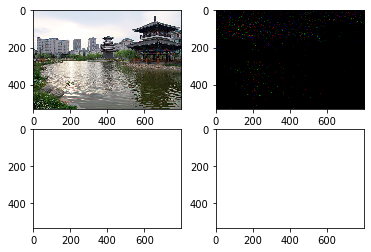

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ni

from imageio import imread,imwrite

a=imread("snut.jpg")    #导入uint8，数据值=0~255，图像 

af = np.copy(a).astype(np.float);

af/=af.max()#转为实数(0,1)图像

afn=af +af.std()*np.random.standard_normal(af.shape);
afn+=afn.min();
afn/=np.max(afn) #给图像加噪波
b=afn.copy()
for i in range(3):
    b[:,:,i]=ni.gaussian_filter(afn[:,:,i],sigma=3)#逐层滤波
    
b+=b.min();
b/=np.max(b)#高斯滤波
m=afn.copy()
for i in range(3):
    m[:,:,i]=ni.median_filter(afn[:,:,i],size=5)#逐层滤波
m+=m.min();
m/=np.max(m)#中值滤波

plt.subplot(221);
plt.imshow(af)
plt.subplot(222)
plt.imshow(afn)
plt.subplot(223);
plt.imshow(b,cmap='winter')
plt.subplot(224);
plt.imshow(m,cmap='summer')
plt.show()